**1. Installation**

connect to drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# %tensorflow_version 1.x
# !pip install --upgrade h5py==2.10.0
# !wget https://pysource.com/extra_files/Mask_RCNN_basic_1.zip
# !unzip Mask_RCNN_basic_1.zip
# import sys
# sys.path.append("/content/Mask_RCNN/mrcnn")
import sys
sys.path.append("/content/drive/MyDrive/tuberculosis_model/Mask_RCNN/mrcnn")
from m_rcnn import *
%matplotlib inline

TensorFlow 1.x selected.
     |████████████████████████████████| 2.9 MB 4.3 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
VERS 0.2


Using TensorFlow backend.


**Graphics Details**

In [5]:
!nvidia-smi

Sat May 21 07:41:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8    27W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**2. Image Dataset**




In [6]:

#image dataset path
images_path = "/content/drive/MyDrive/tuberculosis_model/tb_dataset_v6.zip"

#labeled image files
train_annotations_path = "/content/drive/MyDrive/tuberculosis_model/train.json"
val_annotations_path = "/content/drive/MyDrive/tuberculosis_model/test.json"

#extracted to tb_dataset 
extract_images(os.path.join("/content/",images_path), "/content/tb_dataset")

Extracted: 380 images


In [7]:

dataset_train = load_image_dataset(os.path.join("/content/", train_annotations_path), "/content/tb_dataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", val_annotations_path), "/content/tb_dataset", "test")
class_number = dataset_train.count_classes()

print("Classes: {}".format(class_number))

Annotation json path:  /content/drive/MyDrive/tuberculosis_model/train.json
Annotation json path:  /content/drive/MyDrive/tuberculosis_model/test.json
Train: 262
Validation: 9
Classes: 1


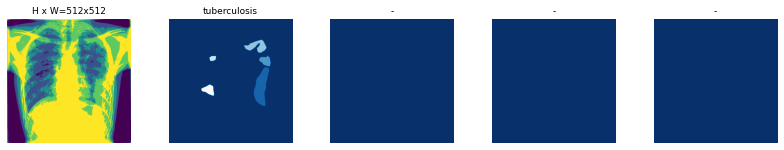

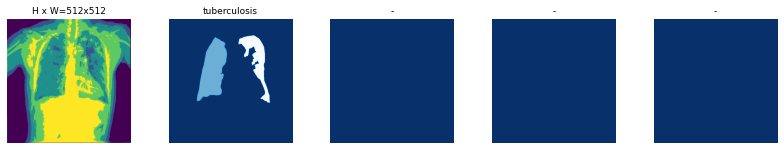

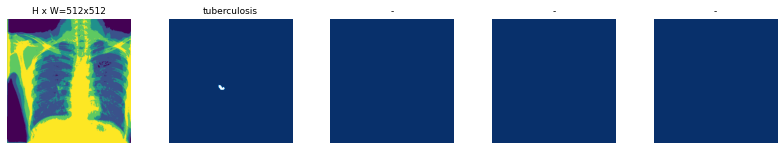

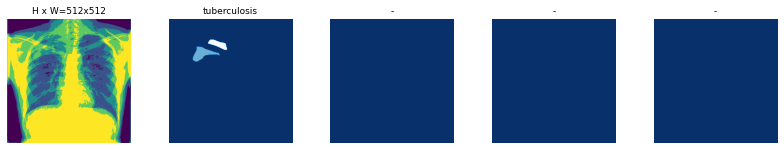

In [8]:
# Load image samples
display_image_samples(dataset_train)

**3. Training**

Train Mask RCNN on your custom Dataset.

In [9]:
# Load Configuration
config = CustomConfig(class_number)
#config.display()
model = load_training_model(config)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
box_ind is deprecated, use box_indices instead
/content/drive/MyDrive/tuberculosis_model/Mask_RCNN/mask_rcnn_coco.h5


In [8]:
# Start Training
epoch_count=20
train_head(model, dataset_train, dataset_val,epoch_count, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/tuberculosis_model/Mask_RCNN/logs/object20220521T0507/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4     

**4. Detection**

In [10]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)



Instructions for updating:
Use `tf.cast` instead.
Loading weights from  /content/drive/MyDrive/tuberculosis_model/Mask_RCNN/logs/object20220521T0507/mask_rcnn_object_0020.h5
Re-starting from epoch 20


original_image           shape: (512, 512, 3)         min:    1.00000  max:  253.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    1.00000  max:  253.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -115.80000  max:  129.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int64
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32



Annotation


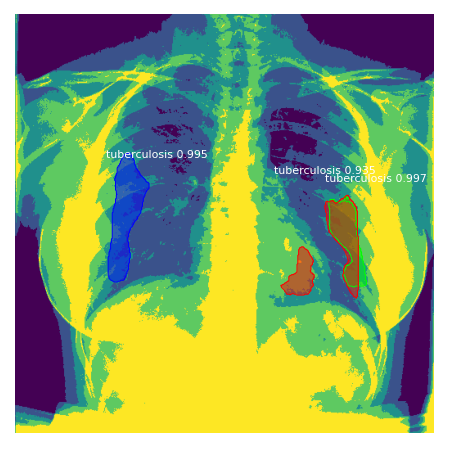

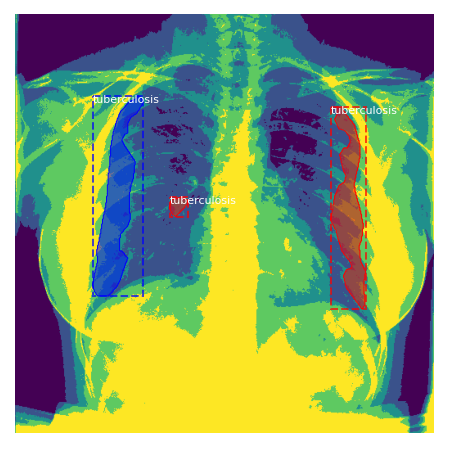

In [11]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)